# problem 1

### 1) Determine whether equation (4) is elliptic, parabolic or hyperbolic. Show your reasoning and calculations.

$$
\frac { \partial ^ { 2 } u } { \partial x ^ { 2 } } + \frac { \partial ^ { 2 } u } { \partial y ^ { 2 } } = \frac { q } { D }
$$

 write the equation into linear form:
$$
a u _ { x x } + b u _ { x y } + c u _ { y y } + d u _ { x } + e u _ { y } + f u = 0
$$
then 
$$ 
a = 1, b = 0, c = 1,  b ^ { 2 } - 4 a c = -4 < 0
$$

therefore the equation is elliptic.

### 2) Using the Taylor series expansion, show that the central difference method for the second derivative is second-order accurate.

$$
\begin{array} { c } { u ( x + h ) = u ( x ) + h u ^ { \prime } ( x ) + \frac { h ^ { 2 } } { 2 ! } u ^ { \prime \prime } ( x ) + \frac { h ^ { 3 } } { 3 ! } u ^ { \prime \prime \prime } ( x ) + \mathcal { O } \left( h ^ { 4 } \right) } \\ { u ( x - h ) = u ( x ) - h u ^ { \prime } ( x ) + \frac { h ^ { 2 } } { 2 ! } u ^ { \prime \prime } ( x ) - \frac { h ^ { 3 } } { 3 ! } u ^ { \prime \prime \prime } ( x ) + \mathcal { O } \left( h ^ { 4 } \right) } \end{array}
$$

$$
u ( x + h ) + u ( x - h ) - 2 u ( x ) = h ^ { 2 } u ^ { \prime \prime } ( x ) + 2 \frac { h ^ { 4 } } { 4 ! } u ^ { \prime \prime \prime \prime } ( x ) + \mathcal { O } \left( h ^ { 5 } \right)
$$

$$
u ^ { \prime \prime } ( x ) = \frac { u ( x + h ) + u ( x - h ) - 2 u ( x )}{ h ^ { 2 }} - 2 \frac { h ^ { 2 } } { 4 ! } u ^ { \prime \prime \prime \prime } ( x ) + \mathcal { O } \left( h ^ { 3 } \right)
$$

trunction error $$
\mathcal { O } ( \Delta x ) ^ { 2 }
$$

hence the central difference method for the second derivative is second-order accurate.

### 3) Use a second-order central difference method to derive the finite difference schemes for the discretisation of all derivative terms for Equations (4) and (5) in the interior of the domain.


Define $$
\begin{array} { l } { x _ { i } = x _ { 0 } + i \Delta x } \\ { y _ { i } = y _ { 0 } + i \Delta y } \end{array}
$$

$$
u _ { i , j } = u \left( x _ { i } , y _ { j } \right)
$$
$$
z _ { i , j } = z \left( x _ { i } , y _ { j } \right)
$$

Apply the finite-difference formulas on either variable $x,y$ acting separately on the i and j indices:

$$
\frac { q } { D } =  \frac { u _ { i + 1 , j } - 2 u _ { i , j }  + u _ { i - 1 , j } } { \Delta x ^ { 2 } } + \frac { u _ { i , j + 1 }  - 2 u _ { i , j }  + u _ { i , j - 1 }  } { \Delta y ^ { 2 } }
$$

$$
u _ { i , j } =  \frac { z _ { i + 1 , j } - 2 z _ { i , j }  + z _ { i - 1 , j } } { \Delta x ^ { 2 } } + \frac { z _ { i , j + 1 }  - 2 z _ { i , j }  + z _ { i , j - 1 }  } { \Delta y ^ { 2 } }
$$

Transpose
$$
z _ { i j }  = \frac { \Delta y ^ { 2 } \left( z _ { i + 1 , j }  + z _ { i - 1 , j }  \right) + \Delta x ^ { 2 } \left( z _ { i , j + 1 } + z _ { i , j - 1 }  \right) - u _ { i j }  \Delta x ^ { 2 } \Delta y ^ { 2 } } { 2 \left( \Delta x ^ { 2 } + \Delta y ^ { 2 } \right) }
$$

$$
u _ { i j }  = \frac { \Delta y ^ { 2 } \left( u _ { i + 1 , j } + u _ { i - 1 , j }  \right) + \Delta x ^ { 2 } \left( u _ { i , j + 1 } + u _ { i , j - 1 }  \right) - \frac {q}{D} \Delta x ^ { 2 } \Delta y ^ { 2 } } { 2 \left( \Delta x ^ { 2 } + \Delta y ^ { 2 } \right) }
$$

### 4)  Write a MATLAB programme to determine the deflections 𝑧(𝑥, 𝑦) for a square plate subject to a constant areal load, using the finite difference method in question 3. 

for the discretization of $z _ { i j }$


I.C. $ z = 0 $ everywhere


B.C. $ z = 0$ at  $x = 0,2 $ and $y = 0,2 $

for the discretization of $u _ { i j }$


I.C. $ u = 0 $ everywhere


B.C. $ u = 0$ at $x = 0,2$ and $y = 0,2 $

In [348]:
clear; close all; clc;

L = 2;
N = 81;
q = 33.6;
sigma = 0.3;
delta_z = 0.01;
E = 2 * 10^11;

D = E * delta_z^3 / (12*(1-sigma^2));
b = q/D;

nx = N; dx = L/(nx-1); nit = 300;
ny = N; dy = L/(ny-1);

x = linspace(0,L,nx);
y = linspace(0,L,ny);

In [349]:
% Initial and boundary values
z = zeros(nx,ny);
u = zeros(nx,ny);

In [350]:
% Solve 
for iit = 1:nit+1  %Jacobi iteration
    un = u;
    for i = 2 : nx-1 %space-loop (x)
        for j = 2 : ny-1 %space-loop (y)
            u(i,j) = ((un(i+1,j)+un(i-1,j))*dy^2+(un(i,j+1)+un(i,j-1))*dx^2 ...
            -b*dx^2*dy^2)/((dx^2+dy^2)*2);
        end
    end
    u(1,:) = 0;
    u(nx,:) = 0;
    u(:,1) = 0;
    u(:,ny) = 0;
 end;


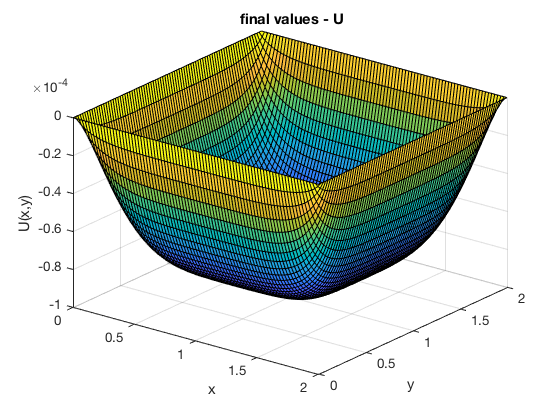

In [351]:
 
% Plot final values
surf(x,y,u)
view(37.5,30)
xlabel('x')
ylabel('y')
zlabel('U(x,y)')
title(' final values - U')


In [352]:
% Solve 
for iit = 1:nit+1  %Jacobi iteration
    zn = z;
    for i = 2 : nx-1 %space-loop (x)
        for j = 2 : ny-1 %space-loop (y)
            z(i,j) = ((zn(i+1,j)+zn(i-1,j))*dy^2+(zn(i,j+1)+zn(i,j-1))*dx^2 ...
            -u(i,j)*dx^2*dy^2)/(dx^2+dy^2)/2;
        end
    end
    z(1,:) = 0;
    z(nx,:) = 0;
    z(:,1) = 0;
    z(:,ny) = 0;
 end;


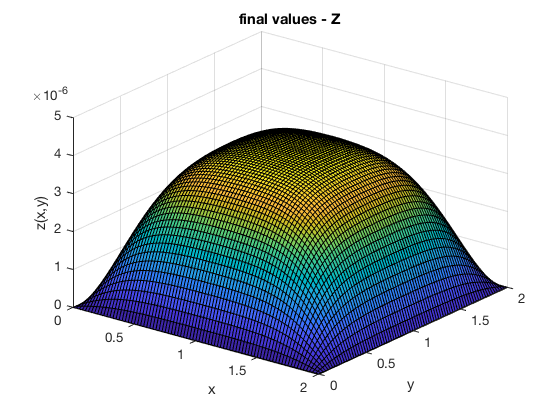

In [353]:
% Plot final values
surf(x,y,z)
view(37.5,30)
xlabel('x')
ylabel('y')
zlabel('z(x,y)')
title(' final values - Z ')

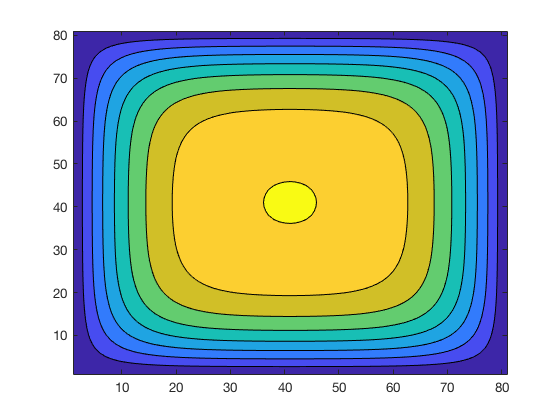

In [354]:
% contour plot
contourf(z)

# problem 2

### 1) Determine whether equation (6) is elliptic, parabolic or hyperbolic. Show your reasoning and calculations.

$$
\frac { \partial C } { \partial t } = D \frac { \partial ^ { 2 } C } { \partial x ^ { 2 } } - U \frac { \partial C } { \partial x } - k C
$$

 write the equation into linear form:
$$
a u _ { x x } + b u _ { x y } + c u _ { y y } + d u _ { x } + e u _ { y } + f u = 0
$$
then 
$$ 
a = D, b = 0, c = 0,  b ^ { 2 } - 4 a c =  0
$$

therefore the equation is parabolic.

### 2) Discretise equation (6) in both the interior of the domain and the boundaries. For the interior nodes, use a forward difference scheme in time, a central difference scheme for the diffusion term, and a backward difference scheme for the advective term; for the Neumann condition at the outlet, use the backward difference scheme.

Interior
$$
\frac { C_{i}^{n+1}-C_{i}^{n}} { \Delta t } = D \frac { C_{i+1}^{n}-2C_{i}^{n} +C_{i-1}^{n}} { \Delta x ^ { 2 } } - U \frac { C_{i}^{n}-C_{i-1}^{n} } { \Delta x } - k C_{i}^n
$$

Boundary
$$
\frac { C_{i}^{n+1}-C_{i}^{n} } { \Delta x } = 0
$$

Transpose

$$
C _ { i } ^ { n + 1 } = C _ { i } ^ { n } - U \frac { \Delta t } { \Delta x } \left( C _ { i } ^ { n } - C _ { i - 1 } ^ { n } \right) + D \frac { \Delta t } { \Delta x ^ { 2 } } \left( C _ { i + 1 } ^ { n } - 2 C _ { i } ^ { n } + C _ { i - 1 } ^ { n } \right) + k \Delta t C _ { i } ^ { n }
$$

In [102]:
clear; close all; clc;

D = 1.7;
K = 0.0025;
U = 0.02;
L = 15;
dt = 0.01; dx = 0.25;

% Initial values
nx = L/dx; nt = 2/dt;

x = linspace(0,L,nx);
c = zeros(1,nx);
c(1) = 100;

In [104]:
for it = 1:nt %time-loop
    cn = c;
    for i = 2 : nx-1
        c(i) = cn(i)-U*dt/dx*(cn(i)-cn(i-1)) ...
            + D*dt/dx^2*(cn(i+1)-2*cn(i)+cn(i-1)) ...
            + K*cn(i)*dt;
    end
    c(1) = 100;
    c(nx) = cn(nx-1);
end

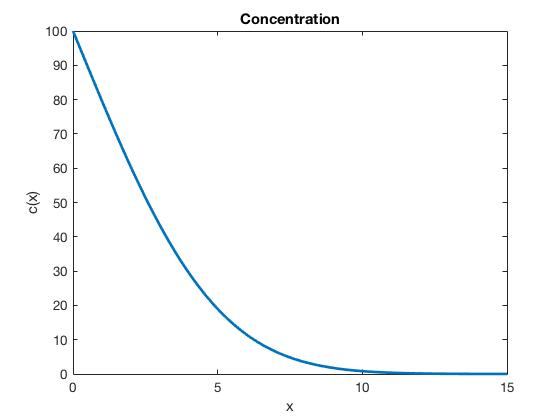

In [105]:
% Plot final values
plot(x,c,'LineWidth',2)
ylim([0,100])
xlabel('x')
ylabel('c(x)')
title('Concentration')

### 4) Now let the simulation from question 3 run until the system has reached a steady state. Consider the system to have reached a steady state when the change between the concentration values in all the nodes from the previous time step to the current one is less than 0.0001%. Report the time when this happens and plot the evolution in time of the concentration value at 𝑥 = 5 m.

In [190]:
clear; close all; clc;

D = 1.7;
K = 0.0025;
U = 0.02;
L = 15;
dt = 0.01; dx = 0.25;

% Initial values
nx = L/dx; nt = 7000;

x = linspace(0,L,nx);
c = zeros(nt,nx);
c(1,1) = 100;
f = false;



In [191]:
it = 1;
while (f == false)
    c(it+1,:) = c(it,:);
    for i = 2 : nx-1
        c(it+1,i) = c(it,i)-U*dt/dx*(c(it,i)-c(it,i-1)) ...
            + D*dt/dx^2*(c(it,i+1)-2*c(it,i)+c(it,i-1)) ...
            + K*c(it,i)*dt;
    end
    
    c(it+1,nx) = c(it,nx-1);
    f = true;
    for i = 1 : nx
        if abs(c(it+1,i)/c(it,i)-1) > 0.0001
            f = false;
        end
    end
    it = it+1;
end 

In [199]:
it


it =

        6921



In [198]:
t = linspace(0,it*dt,it);

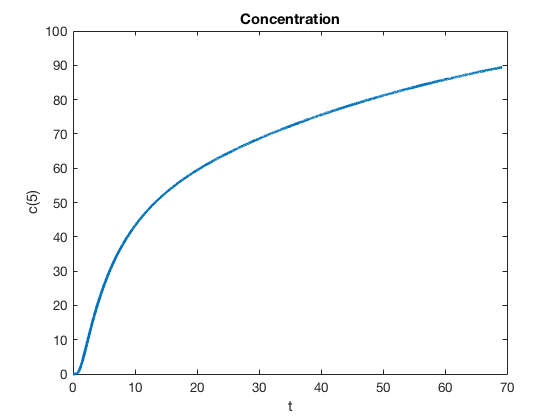

In [196]:
% Plot final values
plot(t,c(1:it,5/dx),'LineWidth',2)
ylim([0,100])
xlabel('t')
ylabel('c(5)')
title('Concentration')

### 5) Discretise equation (6) using the same finite difference schemes in space as in question 2, but this time using an implicit method. Briefly describe what are the advantages and disadvantages of implicit methods compared to explicit methods.


Interior
$$
\frac { C_{i}^{n}-C_{i}^{n-1}} { \Delta t } = D \frac { C_{i+1}^{n-1}-2C_{i}^{n-1} +C_{i-1}^{n-1}} { \Delta x ^ { 2 } } - U \frac { C_{i}^{n-1}-C_{i-1}^{n-1} } { \Delta x } - k C_{i}^{n-1}
$$

Boundary
$$
\frac { C_{i}^{n}-C_{i}^{n-1}}{\Delta x } = 0
$$

$$
C_{1}^{n} = 100
$$


Advantages and disadvantages of implicit methods compared to explicit methods:

Implicit methods are more stable and can prevent divergence if set proper parameters. To achieve given accuracy, it takes much less computational time to use an implicit method with larger time steps, while am explicit method requires impractically small time steps to be the same accurate. However, implicit methods requires an extra computation and can be harder to implement.